In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Cargamos el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Normalizamos los datos
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Convertimos las etiquetas a codificación one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10) 
y_test = tf.keras.utils.to_categorical(y_test, 10)

#Se crea una matriz binaria que representa la clase de la observación i: y_i = 8 --> [0,0,0,0,0,0,0,0,1,0] (10 clases con índice de 0-9)

In [5]:
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    )
datagen.fit(x_train)

Generador de datos para realizar un aumento de datos en tiempo real. El aumento de datos implica la creación de nuevas imágenes a través de la modificación de las existentes, y puede incluir cambios como rotaciones, desplazamientos y volteos. Esto ayuda a nuestro modelo a generalizar mejor al proporcionarle más variación en los datos de entrenamiento.

## Modelo VGG16 pre entrenado

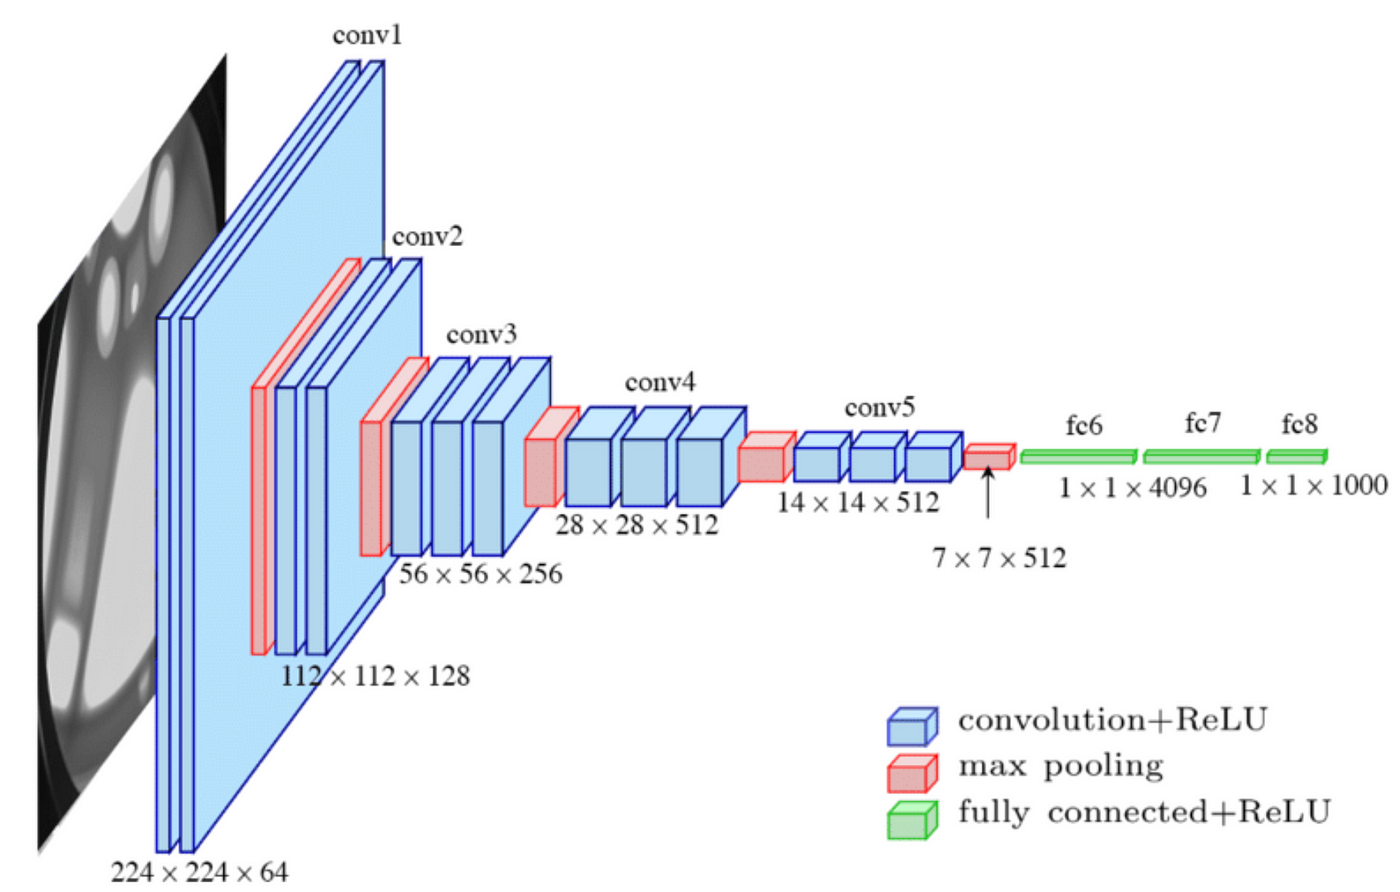

In [6]:
# Cargamos el modelo VGG16 pre-entrenado
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [7]:
for layer in base_model.layers:
    layer.trainable = False

In [8]:
# Añadimos nuestras propias capas al final del modelo (aprendizaje por transferencia)
# Las capas de convolución ya fueron entrenadas en VGG16 y se mantienen como no entrenables durante el fine tuning
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [9]:
# Compilamos el modelo
model.compile(optimizer=Adam(learning_rate=0.0008), loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
# Entrenamos el modelo
model.fit(datagen.flow(x_train, y_train, batch_size=64), 
          steps_per_epoch=x_train.shape[0] // 64, 
          epochs=75, verbose=1, 
          validation_data=(x_test, y_test)
         )

Epoch 1/75
781/781 [==============================] - 65s 83ms/step - loss: 2.0407 - accuracy: 0.2374 - val_loss: 1.6236 - val_accuracy: 0.4198
Epoch 2/75
781/781 [==============================] - 67s 86ms/step - loss: 1.7433 - accuracy: 0.3765 - val_loss: 1.4599 - val_accuracy: 0.4889
Epoch 3/75
781/781 [==============================] - 67s 86ms/step - loss: 1.6448 - accuracy: 0.4244 - val_loss: 1.4123 - val_accuracy: 0.5043
Epoch 4/75
781/781 [==============================] - 70s 90ms/step - loss: 1.5940 - accuracy: 0.4496 - val_loss: 1.3659 - val_accuracy: 0.5298
Epoch 5/75
781/781 [==============================] - 70s 89ms/step - loss: 1.5571 - accuracy: 0.4697 - val_loss: 1.3313 - val_accuracy: 0.5324
Epoch 6/75
781/781 [==============================] - 70s 90ms/step - loss: 1.5341 - accuracy: 0.4764 - val_loss: 1.3245 - val_accuracy: 0.5381
Epoch 7/75
781/781 [==============================] - 71s 91ms/step - loss: 1.5117 - accuracy: 0.4850 - val_loss: 1.3129 - val_accuracy:

781/781 [==============================] - 70s 89ms/step - loss: 1.3318 - accuracy: 0.5602 - val_loss: 1.1690 - val_accuracy: 0.5963
Epoch 58/75
781/781 [==============================] - 69s 88ms/step - loss: 1.3325 - accuracy: 0.5613 - val_loss: 1.1653 - val_accuracy: 0.6065
Epoch 59/75
781/781 [==============================] - 69s 88ms/step - loss: 1.3273 - accuracy: 0.5606 - val_loss: 1.1734 - val_accuracy: 0.5971
Epoch 60/75
781/781 [==============================] - 68s 88ms/step - loss: 1.3230 - accuracy: 0.5622 - val_loss: 1.1602 - val_accuracy: 0.6034
Epoch 61/75
781/781 [==============================] - 70s 89ms/step - loss: 1.3246 - accuracy: 0.5609 - val_loss: 1.1823 - val_accuracy: 0.5930
Epoch 62/75
781/781 [==============================] - 69s 88ms/step - loss: 1.3221 - accuracy: 0.5633 - val_loss: 1.1571 - val_accuracy: 0.6032
Epoch 63/75
781/781 [==============================] - 69s 88ms/step - loss: 1.3194 - accuracy: 0.5659 - val_loss: 1.1716 - val_accuracy: 0.60

In [11]:
# Evaluamos el modelo
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1517428159713745
Test accuracy: 0.6032000184059143


- Probar con más epochs y diferentes hiperparámetros para mejorar el rendimiento

In [12]:
import matplotlib.pyplot as plt
import numpy as np

1/1 [==============================] - 0s 130ms/step


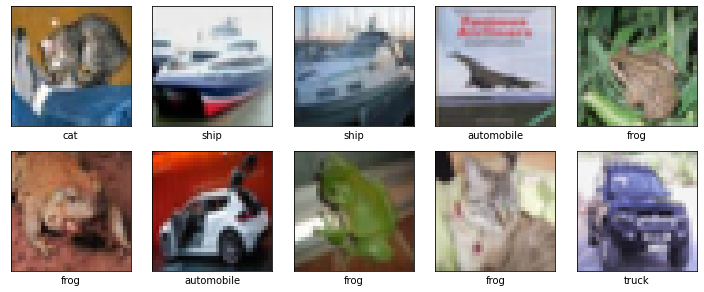

In [13]:
selected_images = x_test[:10]
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predictions = model.predict(selected_images)
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(selected_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    plt.xlabel(class_names[predicted_label])
plt.tight_layout()
plt.show()


#### ¿Cómo entrenar un modelo similar con datos propios?

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Crear un generador de datos
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # normalizamos los valores de pixel a la escala [0, 1]

train_generator = datagen.flow_from_directory(
        'data/train',  # este es el directorio de imágenes de entrenamiento
        target_size=(150, 150),  # todas las imágenes se redimensionarán a 150x150 (depende de nuestras imágenes)
        batch_size=32,
        class_mode='categorical',  # dado que hay múltiples clases, necesitamos utilizar el modo 'categorical', 'binary' cuando son 2 clases
        subset='training')  # establecemos como subconjunto de entrenamiento

validation_generator = datagen.flow_from_directory(
        'data/train',  # mismo directorio que el de entrenamiento, también podría ser un directorio de validación separado
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',  # dado que hay múltiples clases, necesitamos utilizar el modo 'categorical'
        subset='validation')  # establecemos como subconjunto de validación

# Aquí, necesitarías cambiar el número en la siguiente línea a la cantidad de clases que tienes
num_classes = 10 

# Construir el modelo
model = Sequential()
# La primera capa es una capa convolucional con 32 filtros, un tamaño de filtro de (3,3), función de activación ReLU y un tamaño de imagen de entrada de (150, 150, 3)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))  # La segunda capa es una capa de pooling para reducir la dimensionalidad espacial
model.add(Conv2D(64, (3, 3), activation='relu'))  # Sigue otra capa convolucional con 64 filtros
model.add(MaxPooling2D((2, 2)))  # Y otra capa de pooling
model.add(Conv2D(128, (3, 3), activation='relu'))  # Una última capa convolucional con 128 filtros
model.add(MaxPooling2D((2, 2)))  # Y una última capa de pooling
model.add(Flatten())  # Luego aplanamos la salida para poder introducirla en una capa densa
model.add(Dense(512, activation='relu'))  # Añadimos una capa densa con 512 neuronas
model.add(Dense(num_classes, activation='softmax'))  # La capa final utiliza una función de activación softmax para obtener probabilidades de cada clase. El número de neuronas es igual al número de clases.
                                                     # sigmoid si fueran 2 clases

# Compilar el modelo
model.compile(loss='categorical_crossentropy',  # Utilizamos la entropía cruzada categórica como función de pérdida ya que es un problema de clasificación multiclase
              optimizer=Adam(learning_rate=0.005),  # El optimizador Adam suele funcionar bien
              metrics=['accuracy'])  # Queremos seguir la precisión durante el entrenamiento
                                     # binary_crossentropy si fueran 2 clases

# Entrenar el modelo
model.fit(train_generator, epochs=10, validation_data=validation_generator)
